
# TestBulkEdge

Test the fluctuatona at the MP Bulk Edge resolve issue #64

https://github.com/CalculatedContent/WeightWatcher/issues/84


In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


### Import WeightWatcher

set custom Logging at WARN Level

In [2]:

def marchenko_pastur_pdf(x_min, x_max, Q, sigma=1):
    y=1/Q
    x=np.arange(x_min,x_max,0.001)

    b=np.power(sigma*(1 + np.sqrt(1/Q)),2) # Largest eigenvalue
    a=np.power(sigma*(1 - np.sqrt(1/Q)),2) # Smallest eigenvalue
    return x, (1/(2*np.pi*sigma*sigma*x*y))*np.sqrt((b-x)*(x-a))

In [3]:
def plot_mp(evals, Q, sigma=1.0):
    ev = np.array(evals)
    x_min, x_max =  0, np.max(evals)

    x, mp = marchenko_pastur_pdf(x_min, x_max, Q, sigma)
    plt.plot(x,mp, linewidth=1, color = 'r', label="MP fit")

In [4]:
Q = 2
evals = []
R = 5000
for idx in range(R):
    M = 128
    N = int(Q*M)
    W = np.random.normal(0,1,size=(N,M))
    X = (1/N)*np.dot(W.T,W)
    evals.extend(np.linalg.eigvals(X))
    


/var/folders/m0/30vm2tcj4tv_dsf3mf9csxsc0000gn/T/ipykernel_11865/2972646846.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return x, (1/(2*np.pi*sigma*sigma*x*y))*np.sqrt((b-x)*(x-a))
/var/folders/m0/30vm2tcj4tv_dsf3mf9csxsc0000gn/T/ipykernel_11865/2972646846.py:7: RuntimeWarning: invalid value encountered in sqrt
  return x, (1/(2*np.pi*sigma*sigma*x*y))*np.sqrt((b-x)*(x-a))


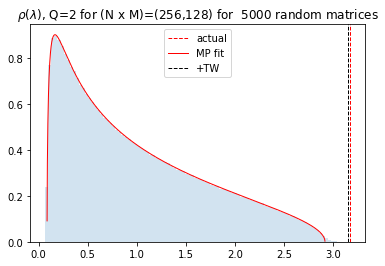

In [6]:
plt.hist(evals, bins=100, density=True, alpha=0.2);
plt.title(r"$\rho(\lambda)$, Q={} for (N x M)=({},{}) for  {} random matrices".format(Q, N, M, R))

plt.axvline(x=np.max(evals), color='r', linewidth=1, ls='dashed', label='actual')
plot_mp(evals, Q)

bulk_max = (1.0 * (1 + 1/np.sqrt(Q)))**2
TW = 1/np.sqrt(Q)*np.power(bulk_max, 2/3)*np.power(M, -2/3)
TW = np.sqrt(TW)
plt.axvline(x=bulk_max+TW, color='black', linewidth=1, ls='dashed', label='+TW')

plt.legend()
plt.show()
